# Data Preprocessing

## 1. Importing Libraries

In [1]:
import pandas as pd
import ucimlrepo as ucr

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

## 2. Dataset

### 2.1 Downloading dataset using ucimlrepo

In [2]:
heart_disease = ucr.fetch_ucirepo(id=45)
df = pd.concat([heart_disease.data.features, heart_disease.data.targets], axis=1)
df.to_csv('../data/heart_disease.csv', index=False)

### 2.2 Load data

In [3]:
df = pd.read_csv('../data/heart_disease.csv')

## 3. Exploratory data analysis

In [4]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.68976

In [5]:
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [6]:
print(df_imputed.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [7]:
df_encoded = pd.get_dummies(df_imputed, columns=['cp', 'restecg', 'slope', 'thal'])

In [8]:
scaler = StandardScaler()
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


In [9]:
df_encoded.to_csv('../data/heart_disease_cleaned.csv', index=False)

## 4. Visualization

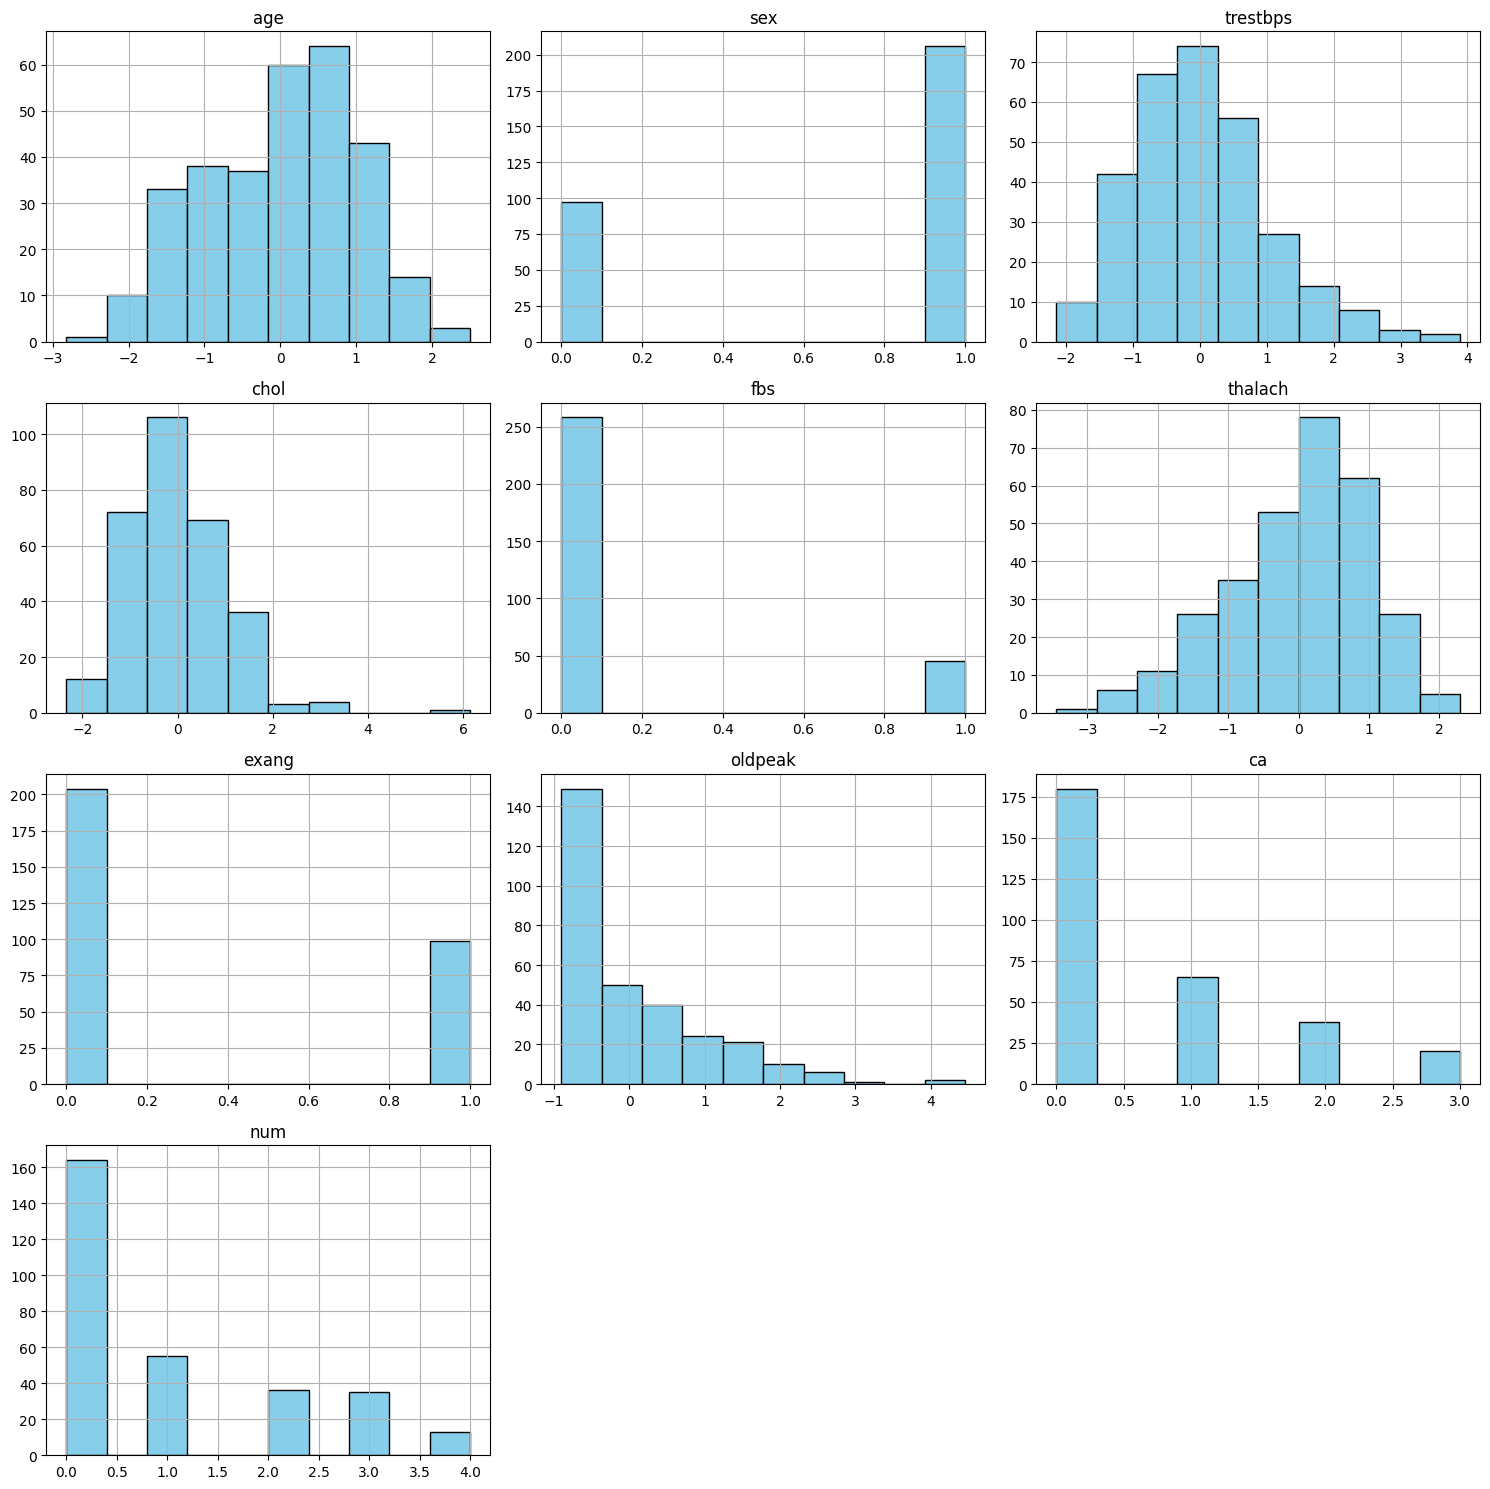

In [10]:
df_encoded.hist(figsize=(15, 15), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.title('Histograms')
plt.savefig('../results/histograms.png')
plt.show()

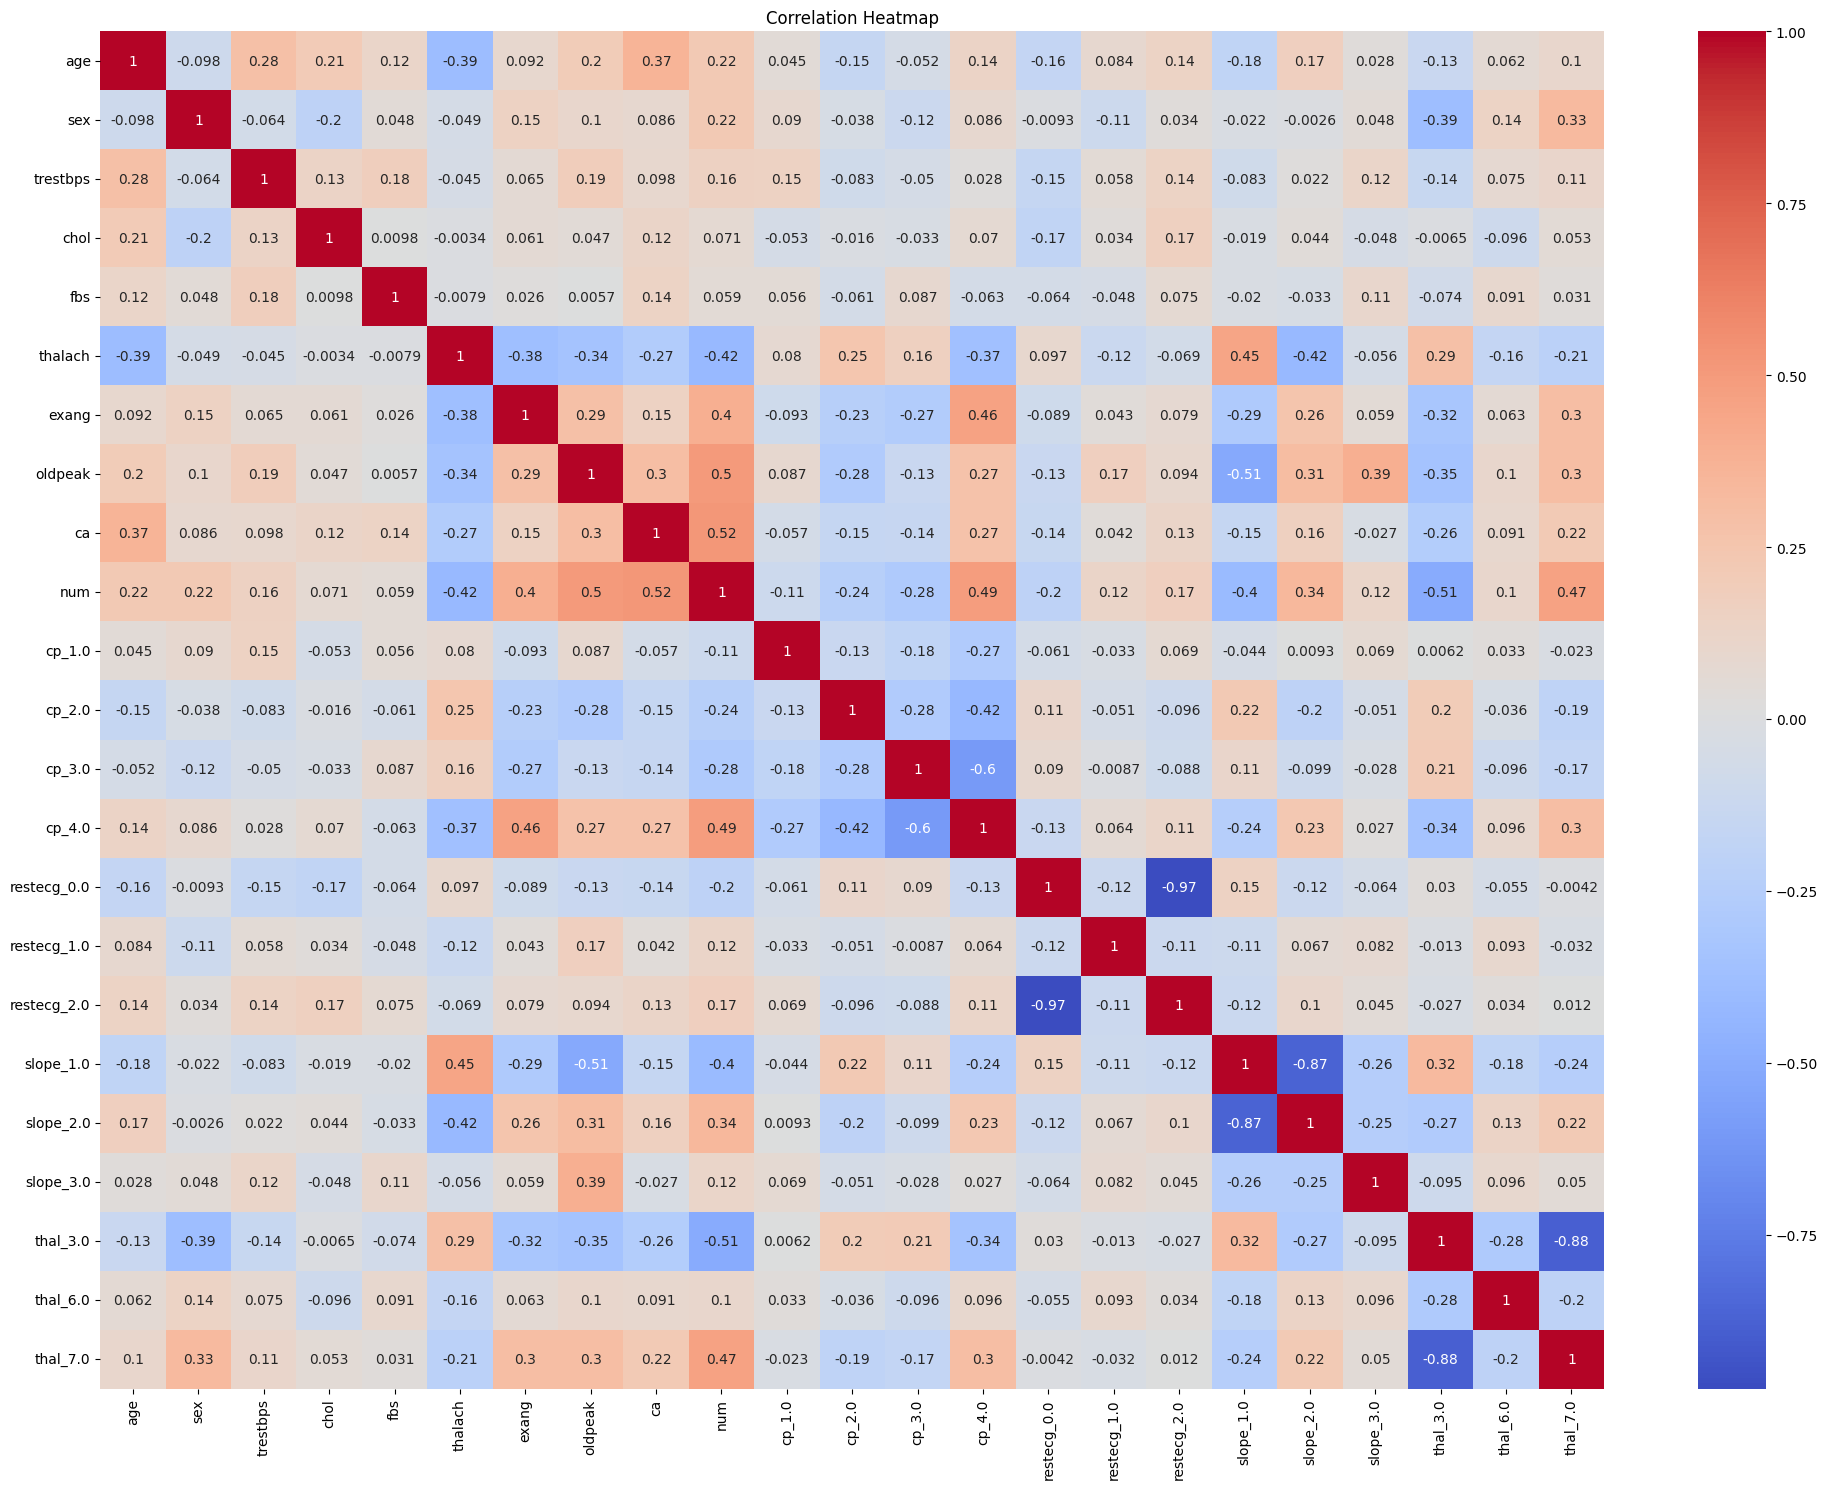

In [11]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout() 
plt.savefig('../results/correlation_heatmap.png')
plt.show()

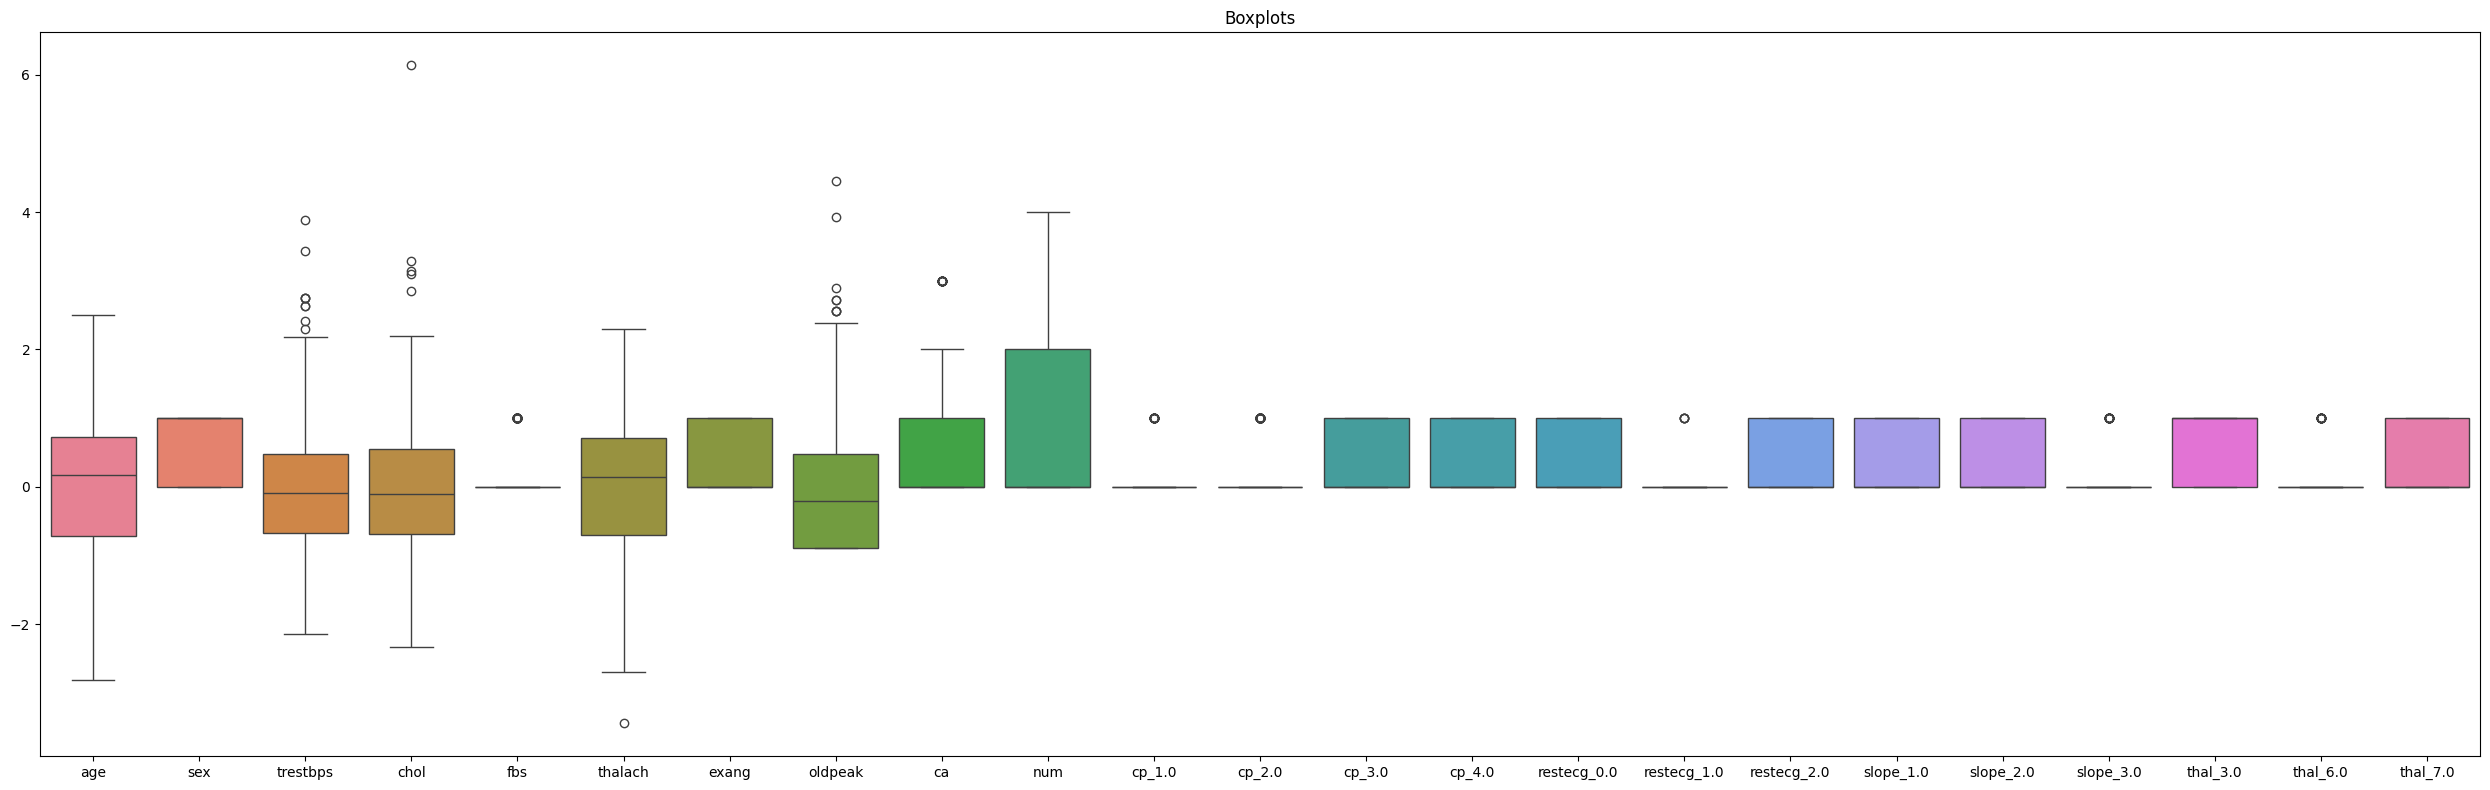

In [12]:
plt.figure(figsize=(25, 8))
sns.boxplot(data=df_encoded, orient='v')
plt.title("Boxplots")
plt.tight_layout()
plt.savefig('../results/boxplots.png')
plt.show()